In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [100]:
df = pd.read_csv('../BD/Supermercado.csv')


In [101]:
df.shape

(2019501, 12)

In [102]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [103]:
week_days = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

df['day'] = df['order_dow'].map(week_days)

df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients,Wednesday
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree,Wednesday
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter,Wednesday
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables,Wednesday
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables,Wednesday


#### Key del Dataset
order_id – (A unique number to identity the order)

user_id - (A unique number to identify the user)

order_number – (Number of the order)

order_dow – (Day of the Week the order was made)

order_hour_of_day – (Time of the order)

days_since_prior_order - (History of the order)

product_id – (Id of the product)

add_to_cart_order – (Number of items added to cart)

reordered – (If the reorder took place)

department_id - (Unique number allocated to each department)

department – (Names of the departments)

product_name – (Name of the products)


https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023/code

#### Info basica DF

In [104]:
df.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients,Wednesday
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree,Wednesday
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter,Wednesday
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables,Wednesday
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables,Wednesday


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
 12  day                     object 
dtypes: float64(1), int64(9), object(3)
memory usage: 200.3+ MB


In [106]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2019501.00,2019501.00,2019501.00,2019501.00,2019501.00,1895159.00,2019501.00,2019501.00,2019501.00,2019501.00
mean,1707012.76,103067.27,17.15,2.74,13.44,11.39,71.21,8.36,0.59,9.93
std,985983.20,59491.17,17.53,2.09,4.24,8.97,38.21,7.15,0.49,6.28
min,10.00,2.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00
25%,852649.00,51584.00,5.00,1.00,10.00,5.00,31.00,3.00,0.00,4.00
50%,1705004.00,102690.00,11.00,3.00,13.00,8.00,83.00,6.00,1.00,9.00
75%,2559031.00,154600.00,24.00,5.00,16.00,15.00,107.00,11.00,1.00,16.00
max,3421080.00,206209.00,100.00,6.00,23.00,30.00,134.00,137.00,1.00,21.00


In [107]:
print(df.describe())

        order_id    user_id  order_number  order_dow  order_hour_of_day  \
count 2019501.00 2019501.00    2019501.00 2019501.00         2019501.00   
mean  1707012.76  103067.27         17.15       2.74              13.44   
std    985983.20   59491.17         17.53       2.09               4.24   
min        10.00       2.00          1.00       0.00               0.00   
25%    852649.00   51584.00          5.00       1.00              10.00   
50%   1705004.00  102690.00         11.00       3.00              13.00   
75%   2559031.00  154600.00         24.00       5.00              16.00   
max   3421080.00  206209.00        100.00       6.00              23.00   

       days_since_prior_order  product_id  add_to_cart_order  reordered  \
count              1895159.00  2019501.00         2019501.00 2019501.00   
mean                    11.39       71.21               8.36       0.59   
std                      8.97       38.21               7.15       0.49   
min                     

In [108]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
day                            0
dtype: int64

In [109]:
df = df.dropna()

In [110]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
day                       0
dtype: int64

In [111]:
df.duplicated().sum()

0

In [112]:
df.nunique()

order_id                  187746
user_id                    98918
order_number                  99
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
day                            7
dtype: int64

In [113]:
department_counts = df['department'].value_counts()
product_name_counts = df['product_name'].value_counts()

print("Department counts:\n", department_counts)
print("\nProduct name counts:\n", product_name_counts)

Department counts:
 department
produce            553916
dairy eggs         316966
snacks             169855
beverages          158100
frozen             130049
pantry             108800
bakery              68430
canned goods        61844
deli                60934
dry goods pasta     50475
household           43239
breakfast           41733
meat seafood        41484
personal care       26154
babies              24633
international       15530
alcohol              8663
pets                 5622
missing              4608
other                2088
bulk                 2036
Name: count, dtype: int64

Product name counts:
 product_name
fresh fruits                  213224
fresh vegetables              199526
packaged vegetables fruits    103016
yogurt                         85176
packaged cheese                57683
                               ...  
kitchen supplies                 517
baby accessories                 476
baby bath body care              473
beauty                      

#### Ventas segun Dia y Momento del Dia

In [114]:
df.groupby('order_hour_of_day', as_index=False).agg({'user_id':'count'}).sort_values(by='user_id', ascending=False)

,order_hour_of_day,user_id
10,10,162876
11,11,159915
14,14,157495
15,15,156790
13,13,155976
12,12,153216
16,16,147884
9,9,141713
17,17,120847
8,8,101008


array([<Axes: ylabel='count'>], dtype=object)

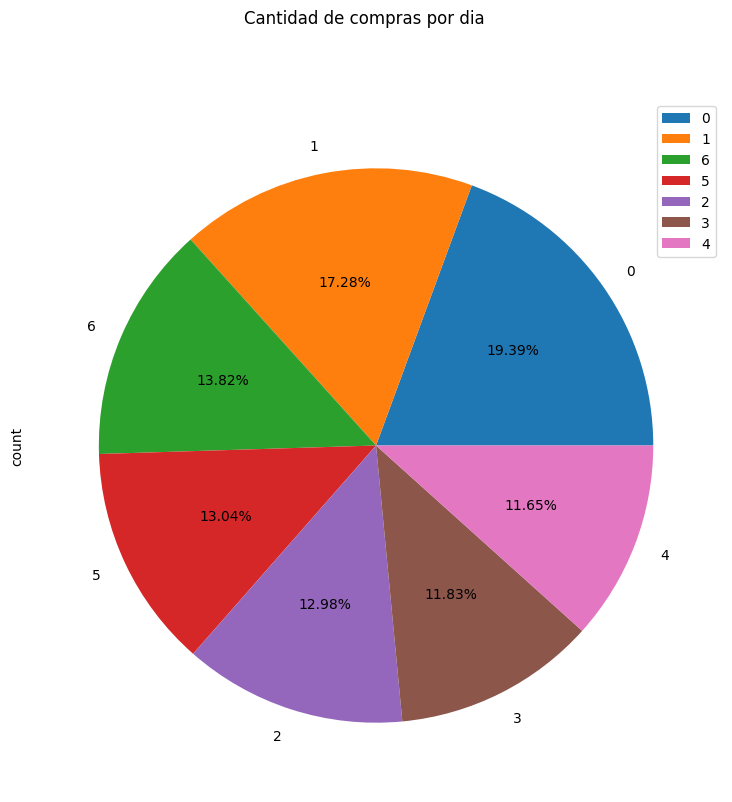

In [115]:
df.groupby('order_dow')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='pie', autopct='%1.2f%%', subplots=True,
                                                                                                title='Cantidad de compras por dia', figsize=(9, 9))

In [116]:
def order_time(x):
    if x in[6, 7, 8, 9, 10, 11, 12]:
        return 'Morning'
    if x in[13, 14, 15, 16, 17]:
        return 'Afternoon'
    if x in[18, 19, 20, 21, 22]:
        return 'Night'
    if x in[23, 24, 0, 1, 2, 3, 4, 5]:
        return 'Dawn'
    return x

In [117]:
df['order_time_list']=df['order_hour_of_day'].apply(order_time)
df.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day,order_time_list
1268869,881412,85882,18,1,14,8.00,38,12,1,1,frozen,frozen meals,Tuesday,Afternoon
2016850,887585,174177,22,5,13,16.00,14,10,0,20,deli,tofu meat alternatives,Saturday,Afternoon
493332,1570480,94652,30,2,12,1.00,83,7,1,4,produce,fresh vegetables,Wednesday,Morning
1566395,2021317,183206,8,2,14,4.00,123,17,0,4,produce,packaged vegetables fruits,Wednesday,Afternoon
1022649,904235,136896,59,5,13,7.00,43,44,1,3,bakery,buns rolls,Saturday,Afternoon


<Axes: title={'center': 'Momento del dia en que se realizo la orden'}, xlabel='order_time_list'>

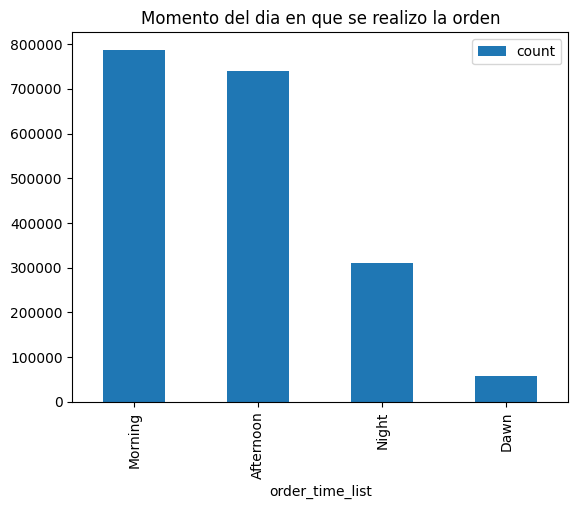

In [118]:
df.groupby('order_time_list')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='bar',
                                                                                                    title='Momento del dia en que se realizo la orden')

In [119]:
df.pivot_table(index='order_dow', columns='order_time_list', values='user_id', aggfunc=['count'])

count                      
order_time_list Afternoon   Dawn Morning  Night
order_dow                                      
0                  152295  10696  147980  56442
1                  121606   8320  149268  48256
2                   94248   7333  101837  42644
3                   88108   6752   90650  38718
4                   84014   7674   86588  42603
5                   95263   8040  104181  39657
6                  103458   8887  106820  42821

In [120]:
pivot_table = df.pivot_table(index='order_dow', columns='order_time_list', values='user_id', aggfunc='count')

correct_order = ['Dawn', 'Morning', 'Afternoon', 'Night']

pivot_table = pivot_table[correct_order]

print(pivot_table)

order_time_list   Dawn  Morning  Afternoon  Night
order_dow                                        
0                10696   147980     152295  56442
1                 8320   149268     121606  48256
2                 7333   101837      94248  42644
3                 6752    90650      88108  38718
4                 7674    86588      84014  42603
5                 8040   104181      95263  39657
6                 8887   106820     103458  42821


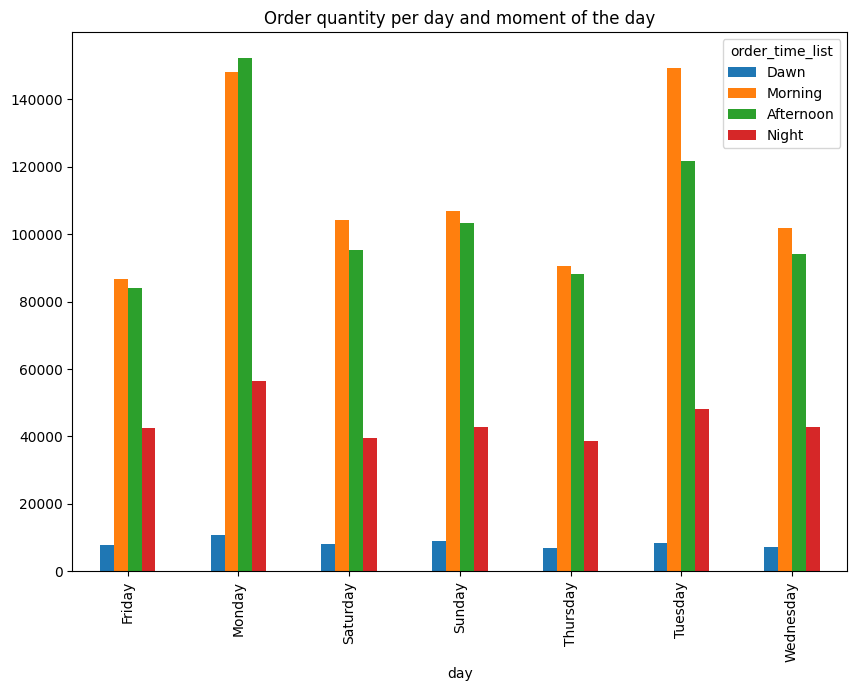

In [121]:
pivot_table = df.pivot_table(index='day', columns='order_time_list', values='user_id', aggfunc='count')

ordered_columns = ['Dawn', 'Morning', 'Afternoon', 'Night']
pivot_table = pivot_table.reindex(ordered_columns, axis=1)

pivot_table.plot(kind='bar', title='Order quantity per day and moment of the day', figsize=(10, 7))
plt.show()

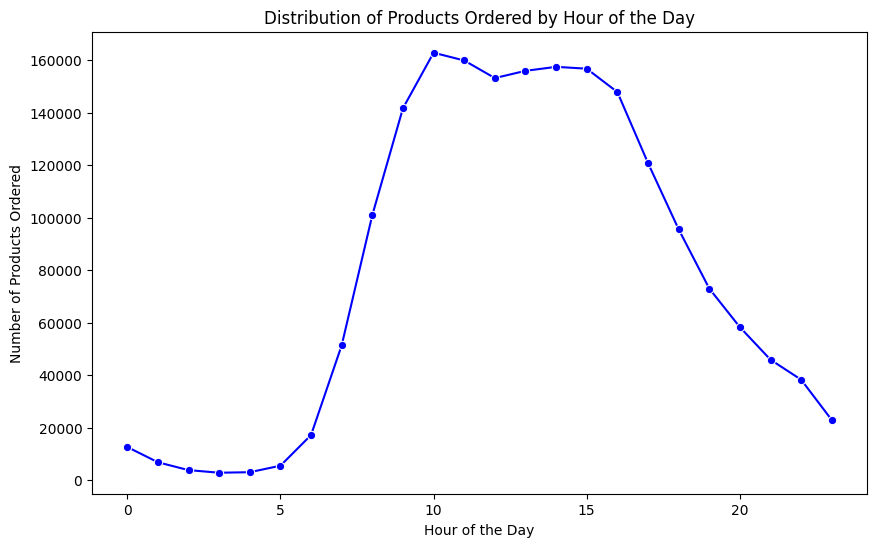

In [122]:
products_by_hour = df.groupby('order_hour_of_day')['product_id'].count().reset_index(name='order_count')

plt.figure(figsize=(10, 6))
sns.lineplot(x='order_hour_of_day', y='order_count', data=products_by_hour, marker='o', linestyle='-', color='b')

plt.title('Distribution of Products Ordered by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')

plt.show()

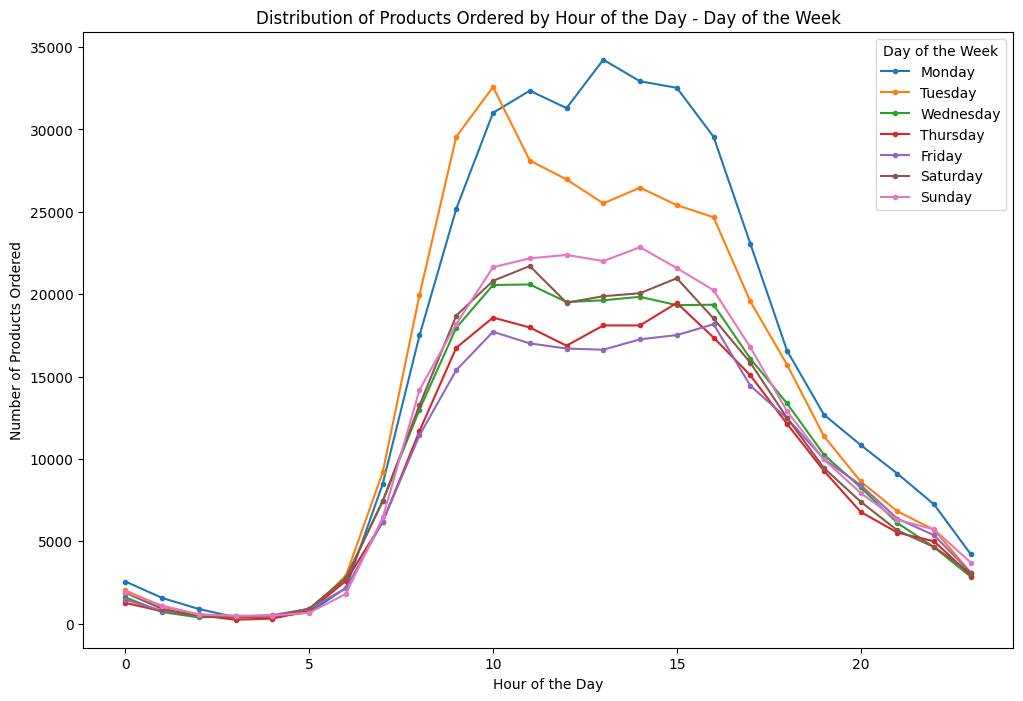

In [123]:
products_by_hour_dow = df.groupby(['day', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12, 8))

dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in dias_semana: 
    plt.plot(products_by_hour_dow.loc[day], label=day, marker='o', markersize=3)

plt.title('Distribution of Products Ordered by Hour of the Day - Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Products Ordered')
plt.legend(title='Day of the Week', loc='upper right')

plt.show()

#### Top 10 de Productos Vendidos

In [124]:
Most_sold_product = df.groupby("product_name")[['add_to_cart_order']].sum().reset_index()
top_10_products = Most_sold_product.sort_values(ascending = False, by = 'add_to_cart_order').head(10)

In [125]:
top_10_products.columns
px.bar(top_10_products, x= 'product_name', y= 'add_to_cart_order',color = 'add_to_cart_order', color_continuous_scale=["gray", "skyblue" ,"blue"])

#### Productos mas Reordenados segun Departamento

In [126]:
df['reordered'].value_counts()

reordered
1    1190986
0     704173
Name: count, dtype: int64

<Axes: title={'center': 'Reordereds'}, ylabel='department'>

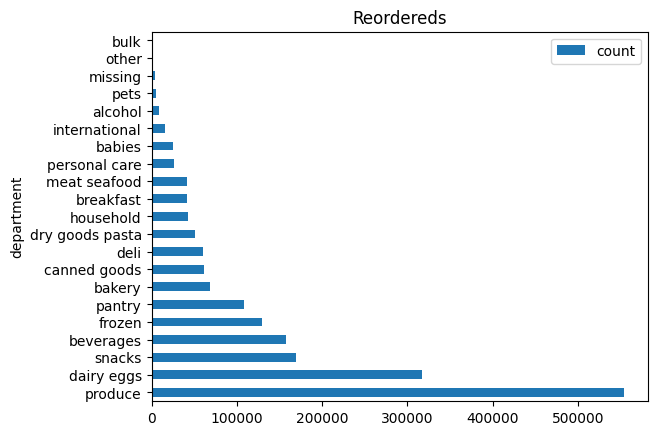

In [127]:
df.groupby('department')['reordered'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='barh', title='Reordereds')

#### Segmentacion de Clientes por Cantidad de Ordenes

In [128]:
max_order_numbers = df.groupby('user_id')['order_number'].max().reset_index()
max_order_numbers.rename(columns={'order_number': 'max_order'}, inplace=True)

df = df.merge(max_order_numbers, on='user_id', how='left')

In [129]:
df.sample(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day,order_time_list,max_order
1735977,1654742,68407,12,5,22,8.00,21,29,1,16,dairy eggs,packaged cheese,Saturday,Night,12
937141,2859607,175919,4,5,6,5.00,128,1,1,3,bakery,tortillas flat bread,Saturday,Morning,4
119245,2361815,163400,96,2,22,11.00,131,13,1,9,dry goods pasta,dry pasta,Wednesday,Night,96
167683,915746,185246,2,1,13,12.00,9,7,0,9,dry goods pasta,pasta sauce,Tuesday,Afternoon,2
1477353,489260,125292,11,6,14,7.00,83,17,1,4,produce,fresh vegetables,Sunday,Afternoon,41
589431,3281245,69968,2,0,12,7.00,112,5,0,3,bakery,bread,Monday,Morning,2
538477,224728,440,9,6,10,8.00,21,2,1,16,dairy eggs,packaged cheese,Sunday,Morning,16
1013375,2839561,30107,4,0,15,30.00,4,22,1,9,dry goods pasta,instant foods,Monday,Afternoon,4
243222,1857322,181646,6,2,11,13.00,63,20,0,9,dry goods pasta,grains rice dried goods,Wednesday,Morning,6
276088,1381960,94186,2,6,17,30.00,112,8,0,3,bakery,bread,Sunday,Afternoon,2


In [130]:
def order_number_group(x):
    if x <= 20:
        x = '1-20 order'
    elif x >20 and x <=40:
        x = '21-40 order'
    elif x >40 and x <=60:
        x = '41-60 order'
    elif x >60 and x <=80:
        x = '61-80 order'
    else:
        x = '81-100 order'
    return x

In [131]:
df['order_number_group']=df['max_order'].apply(order_number_group)
df.sample(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day,order_time_list,max_order,order_number_group
1660351,2623527,138182,7,6,17,19.00,115,1,1,7,beverages,water seltzer sparkling water,Sunday,Afternoon,7,1-20 order
827258,132102,129697,6,0,17,2.00,91,1,1,16,dairy eggs,soy lactosefree,Monday,Afternoon,69,61-80 order
1568422,1228773,69053,4,6,19,3.00,37,1,0,1,frozen,ice cream ice,Sunday,Night,4,1-20 order
1792400,1430947,195322,5,6,16,9.00,86,19,0,16,dairy eggs,eggs,Sunday,Afternoon,5,1-20 order
1031809,385231,93123,6,5,8,14.00,83,2,1,4,produce,fresh vegetables,Saturday,Morning,74,61-80 order


array([<Axes: ylabel='count'>], dtype=object)

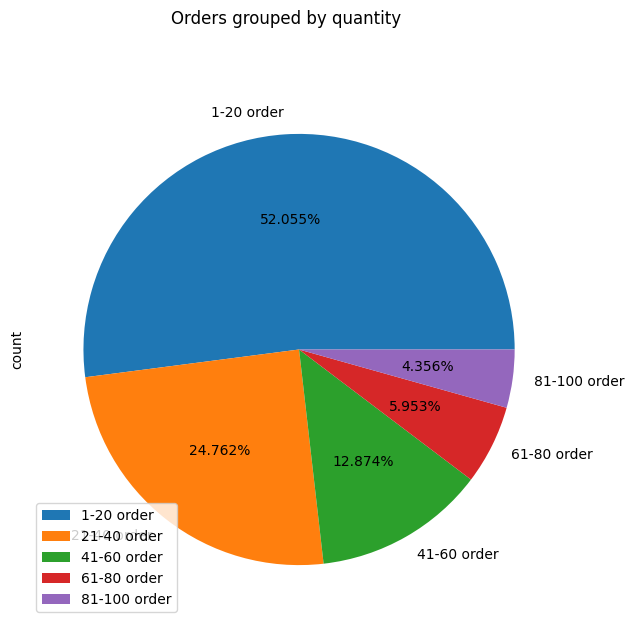

In [132]:
df.groupby('order_number_group')['user_id'].agg(['count']).sort_values(by='count', ascending=False).plot(kind='pie', autopct='%1.3f%%', subplots=True,
                                                                                                        title='Orders grouped by quantity', figsize=(10, 7))

#### Correlacion

In [133]:
df2 = df.copy()

##### Correlación variables numericas

In [134]:
df2['department'] = pd.factorize(df.department)[0]
df2['product_name'] = pd.factorize(df.product_name)[0]
df2['order_time_list'] = pd.factorize(df.order_time_list)[0]
df2['order_number_group'] = pd.factorize(df.order_number_group)[0]
df2['day'] = pd.factorize(df.order_number_group)[0]

In [135]:
df2.corr()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,day,order_time_list,max_order,order_number_group
order_id,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.01,-0.00
user_id,0.00,1.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
order_number,0.00,-0.00,1.00,0.01,-0.04,-0.36,0.00,-0.00,0.25,0.00,-0.02,-0.03,0.10,-0.01,0.76,0.10
order_dow,0.00,-0.00,0.01,1.00,0.01,-0.03,-0.00,-0.01,-0.01,0.00,0.01,0.01,0.01,0.02,0.02,0.01
order_hour_of_day,0.00,-0.00,-0.04,0.01,1.00,0.01,0.00,-0.02,-0.02,-0.01,0.01,0.01,-0.00,0.30,-0.04,-0.00
days_since_prior_order,-0.00,-0.00,-0.36,-0.03,0.01,1.00,0.01,0.05,-0.14,0.00,0.02,0.02,-0.02,-0.01,-0.45,-0.02
product_id,0.00,0.00,0.00,-0.00,0.00,0.01,1.00,0.01,0.00,0.06,-0.06,-0.01,0.00,0.00,-0.00,0.00
add_to_cart_order,-0.00,0.00,-0.00,-0.01,-0.02,0.05,0.01,1.00,-0.15,0.03,0.09,0.06,-0.01,-0.00,-0.01,-0.01
reordered,0.00,-0.00,0.25,-0.01,-0.02,-0.14,0.00,-0.15,1.00,-0.04,-0.14,-0.13,-0.00,0.00,0.22,-0.00
department_id,0.00,0.00,0.00,0.00,-0.01,0.00,0.06,0.03,-0.04,1.00,0.48,0.19,0.00,-0.00,0.00,0.00


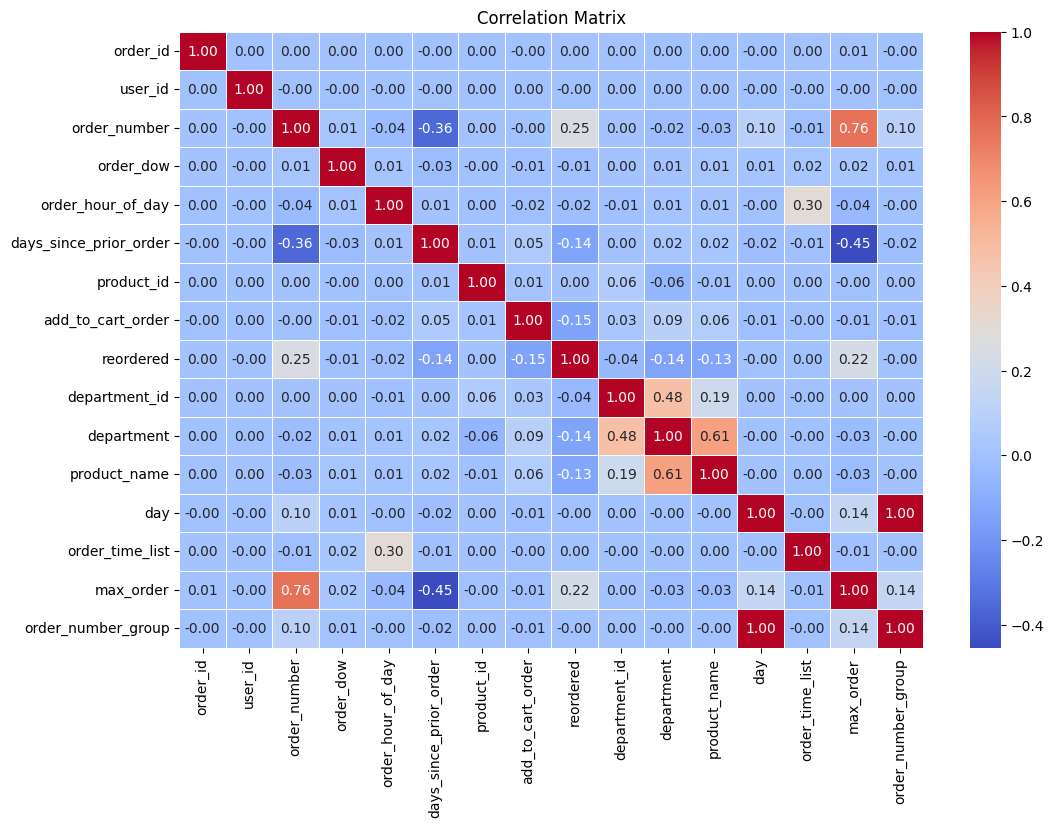

In [136]:
corr_matrix = df2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

##### Correlación de variables categoricas

In [137]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

categorical_columns = ['department', 'product_name', 'day', 'order_time_list', 'order_number_group']

cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

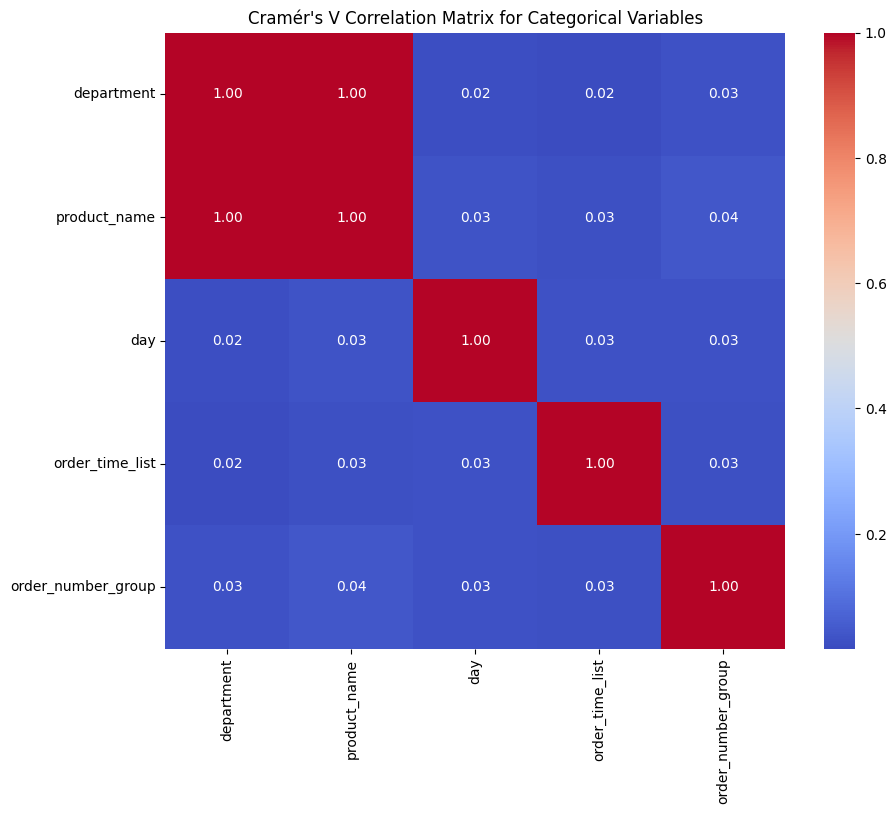

In [138]:
plt.figure(figsize=(10,8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.show()

##### Pares de productos comprados juntos

C:\Users\marti\AppData\Local\Temp\ipykernel_7408\1648073766.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




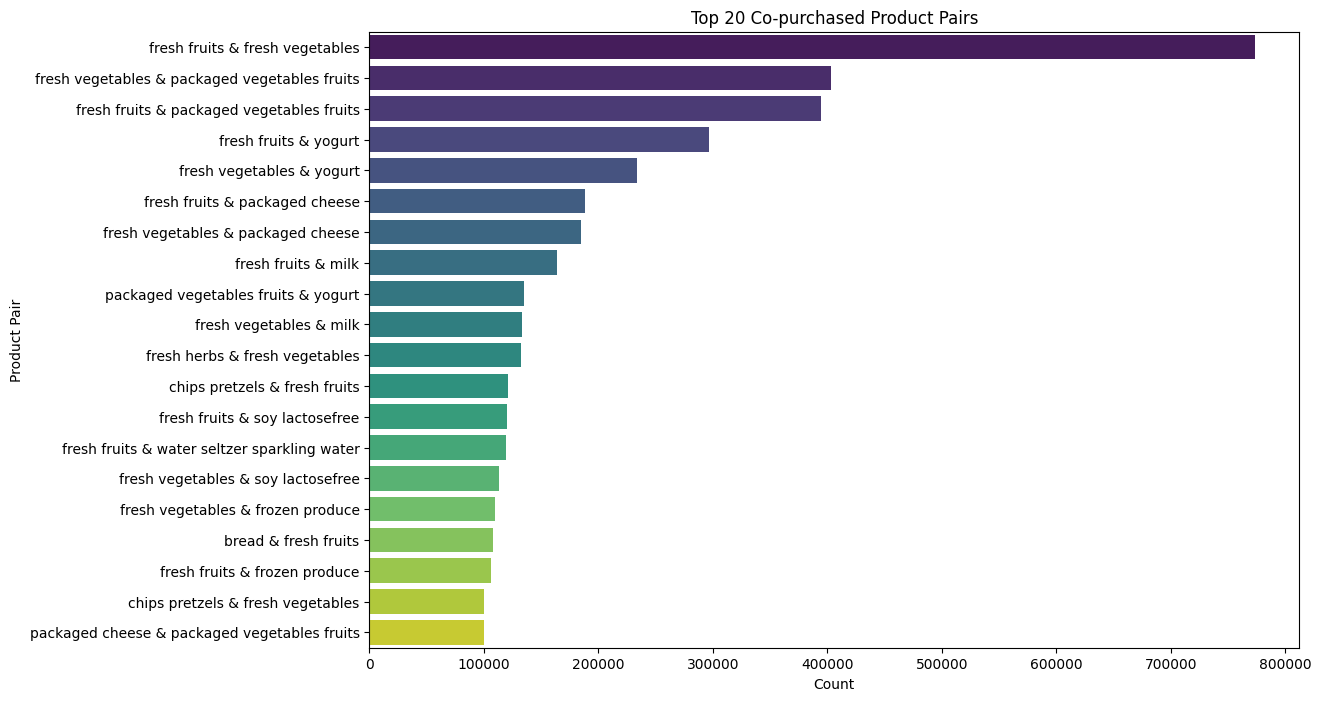

In [139]:
order_products = df[['order_id', 'product_name']]

merged_products = pd.merge(order_products, order_products, on='order_id')

co_purchased_products = merged_products[merged_products['product_name_x'] != merged_products['product_name_y']][['product_name_x', 'product_name_y']]

co_purchased_products['min_product'] = co_purchased_products[['product_name_x', 'product_name_y']].min(axis=1)
co_purchased_products['max_product'] = co_purchased_products[['product_name_x', 'product_name_y']].max(axis=1)

unique_pairs = co_purchased_products[['min_product', 'max_product']].value_counts().reset_index(name='count')

top_pairs = unique_pairs.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='count', y=top_pairs['min_product'].astype(str) + ' & ' + top_pairs['max_product'].astype(str), data=top_pairs, palette='viridis')
plt.title('Top 20 Co-purchased Product Pairs')
plt.xlabel('Count')
plt.ylabel('Product Pair')
plt.show()

#### Outliers

In [140]:
product_counts = df['product_name'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Bottom 5% of Products purchased:")
print(low_freq_products)

print("\Top 5% of Products purchased:")
print(high_freq_products)


Bottom 5% of Products purchased:
product_name
specialty wines champagnes    558
eye ear care                  550
kitchen supplies              517
baby accessories              476
baby bath body care           473
beauty                        354
frozen juice                  273
Name: count, dtype: int64
\Top 5% of Products purchased:
product_name
fresh fruits                     213224
fresh vegetables                 199526
packaged vegetables fruits       103016
yogurt                            85176
packaged cheese                   57683
milk                              52154
water seltzer sparkling water     49679
Name: count, dtype: int64


In [141]:
product_counts = df['department'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Bottom 5% of purchases by Department:")
print(low_freq_products)

print("\nTop 5% of purchases by Department:")
print(high_freq_products)

Bottom 5% of purchases by Department:
department
other    2088
bulk     2036
Name: count, dtype: int64

Top 5% of purchases by Department:
department
produce       553916
dairy eggs    316966
Name: count, dtype: int64


In [142]:
product_counts = df['max_order'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Bottom 5% users:")
print(low_freq_products)

print("\nTop 5% users:")
print(high_freq_products)

Bottom 5% users:
max_order
89     3491
92     3434
84     3201
100    3182
91     3181
Name: count, dtype: int64

Top 5% users:
max_order
4    79580
3    74245
5    73050
2    66885
6    65331
Name: count, dtype: int64


In [143]:
product_counts = df['order_hour_of_day'].value_counts()

low_percentile_freq = product_counts.quantile(0.05)
high_percentile_freq = product_counts.quantile(0.95)

low_freq_products = product_counts[product_counts <= low_percentile_freq]
high_freq_products = product_counts[product_counts >= high_percentile_freq]

print("Bottom 5% of time of day with orders :")
print(low_freq_products)

print("\nTop 5% of time of day with orders:")
print(high_freq_products)

Bottom 5% of time of day with orders :
order_hour_of_day
4    3052
3    2856
Name: count, dtype: int64

Top 5% of time of day with orders:
order_hour_of_day
10    162876
11    159915
Name: count, dtype: int64
